<a href="https://colab.research.google.com/github/opivtorak/2017-21_cars_registration-dynamics_in_Ukraine/blob/main/%D0%9C%D0%BE%D0%B4%D0%B5%D0%BB%D1%8E%D0%B2%D0%B0%D0%BD%D0%BD%D1%8F_%D1%82%D0%B5%D0%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Варіанти завантаження файлів

## 1. Переносимо мишкою чи завантажуємо потрібний нам документ в корінь папки

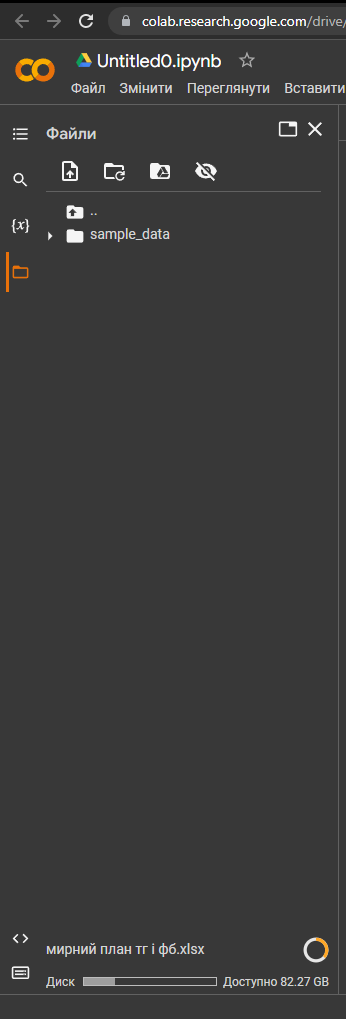

> Абзац із відступом



##2. Підключаємо документ із гуглдиска
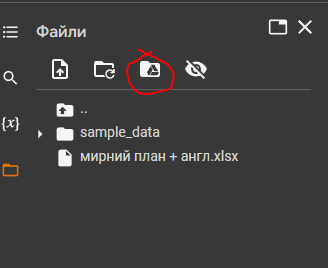

І вставляємо в рядку нижче шлях до папки. Його можна скопіювати прямо на панелі зліва. 

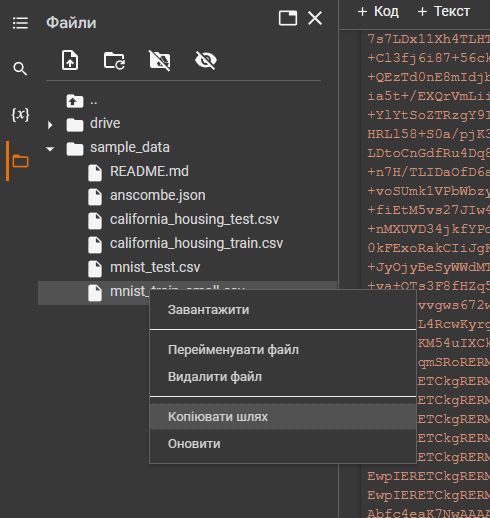

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# ВСТАВТЕ АДРЕСУ ДО ПАПКИ НИЖЧЕ МІЖ ЛАПКАМИ
os.chdir("/content/drive/MyDrive/Analytical Centre DM/Проросійські телеграм-канали про Бахмут")

#Відкриваємо документ. Дивимось на його частинку. І перелік колонок

In [ ]:
import pandas as pd, numpy as np

file=input("Вставте повну назву файлу: ")

Вставте повну назву файлу: Для тренування.xlsx


###Важливо!
Якщо у вас формат файлу xlsx, то виконайте перший рядок під цими словами.
Якщо документ у сsv, то - другий.

In [ ]:
df=pd.read_excel(file)

In [ ]:
df=pd.read_csv(file)

Перші 5 рядків нашого документу виглядають ось так:

In [ ]:
df.head(5)

,ChannelId,ChannelName,MessageId,MessageUrl,ExtraData,Type,Date,EditDate,Content,ReplyTo,FromUserId,MediaType,MediaUrl,MediaTitle,MediaDescription,MediaThumb
0,1076431027,itsdonetsk,60241,https://t.me/itsdonetsk/60241,NaN,message,03/01/2023 10:06:49,03/01/2023 10:07:09,ПАССАЖИРСКИЕ ПЕРЕВОЗКИ\n 🔹Без загранпаспор...,NaN,1076431027,photo,60241.jpg,photo_2023-03-01_10-06-49.jpg,NaN,thumb_60241.jpg
1,1076431027,itsdonetsk,60244,https://t.me/itsdonetsk/60244,NaN,message,03/01/2023 10:38:58,03/01/2023 10:39:31,Бахмут/Артемовск\n\nПодписаться | Предложить...,NaN,1076431027,photo,60244.jpg,photo_2023-03-01_10-38-58.jpg,NaN,thumb_60244.jpg
2,1076431027,itsdonetsk,60411,https://t.me/itsdonetsk/60411,NaN,message,03/02/2023 10:35:46,03/02/2023 10:36:09,ПАССАЖИРСКИЕ ПЕРЕВОЗКИ \n🔹Без загранпаспорта \...,NaN,1076431027,photo,60411.jpg,photo_2023-03-02_10-35-46.jpg,NaN,thumb_60411.jpg
3,1076431027,itsdonetsk,60578,https://t.me/itsdonetsk/60578,NaN,message,03/03/2023 08:50:58,03/03/2023 08:51:23,ПАССАЖИРСКИЕ ПЕРЕВОЗКИ \n🔹Без загранпаспорта \...,NaN,1076431027,photo,60578.jpg,photo_2023-03-03_08-50-58.jpg,NaN,thumb_60578.jpg
4,1076431027,itsdonetsk,60607,https://t.me/itsdonetsk/60607,NaN,message,03/03/2023 11:05:49,03/03/2023 11:06:00,Бахмут/Артемовск\n\nПодписаться | Предложить...,NaN,1076431027,photo,60607.mp4,video_2023-03-03_11-51-03.mp4,NaN,NaN


#Класифікуємо документ за темами

In [ ]:
print("Нижче - перелік колонок вашого документу.\n\nСкопіюйте повну назву потрібної вам колонки з текстом новин\n")
df.columns

Нижче - перелік колонок вашого документу.

Скопіюйте повну назву потрібної вам колонки з текстом новин



Index(['ChannelId', 'ChannelName', 'MessageId', 'MessageUrl', 'ExtraData',
       'Type', 'Date', 'EditDate', 'Content', 'ReplyTo', 'FromUserId',
       'MediaType', 'MediaUrl', 'MediaTitle', 'MediaDescription',
       'MediaThumb'],
      dtype='object')

In [ ]:
column_to_work=input("Вставте назву колонки, для якої мають бути підготовлені теми: ")


!pip install bertopic

from bertopic import BERTopic

df[column_to_work] = df[column_to_work].astype(str)
docs = df[column_to_work].to_numpy()

topic_model = BERTopic(language="multilingual")
topics, probs = topic_model.fit_transform(docs)

topic_model.get_document_info(docs)

Вставте назву колонки, для якої мають бути підготовлені теми: Content
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 81.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 66.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 M

NameError: ignored

# Результат збережеться в ту ж папку, з якої, ви взяли документ, на якому робилася розмітка і назва буде

In [ ]:
topic_df=topic_model.get_document_info(docs)
df["Topic"]=topic_df["Topic"]
df["Probability"]=topic_df["Probability"]
df["Name"]=topic_df["Name"]
df["Top_n_words"]=topic_df["Top_n_words"]
df["Representative_document"]=topic_df["Representative_document"]

In [ ]:
df=df.sort_values(["Topic", column_to_work, "Probability"],
              ascending = [True, True, False])

df

,ChannelId,ChannelName,MessageId,MessageUrl,ExtraData,Type,Date,EditDate,Content,ReplyTo,...,MediaType,MediaUrl,MediaTitle,MediaDescription,MediaThumb,Topic,Probability,Name,Top_n_words,Representative_document
207,1119287642,nvreport,149451,https://t.me/nvreport/149451,NaN,message,03/14/2023 20:13:37,03/15/2023 02:11:32,"""Все заявления о том, что они будут держать Ба...",NaN,...,NaN,NaN,NaN,NaN,NaN,0,1.000000,0_на_что_не_по,на - что - не - по - бахмут - из - всу - бахму...,False
59,1092413834,stranaua,93771,https://t.me/stranaua/93771,NaN,message,03/04/2023 14:39:34,03/04/2023 17:02:40,"""Каждый час в Бахмуте сейчас - как ад"", - так ...",NaN,...,photo,93771.jpg,photo_2023-03-04_14-39-34.jpg,NaN,thumb_93771.jpg,0,1.000000,0_на_что_не_по,на - что - не - по - бахмут - из - всу - бахму...,False
276,1136914098,buntariy,9342,https://t.me/buntariy/9342,NaN,message,03/10/2023 11:57:56,NaN,"""Три дня учебки в Харькове, два рожка выстрели...",NaN,...,photo,9342.mp4,document_2023-03-10_11-57-56.mp4,NaN,NaN,0,0.694883,0_на_что_не_по,на - что - не - по - бахмут - из - всу - бахму...,False
271,1136914098,buntariy,9274,https://t.me/buntariy/9274,NaN,message,03/07/2023 09:56:25,NaN,#Раскладка \nВчера интернет облетело видео ра...,NaN,...,webpage,https://t.me/legitimniy/13718,Легитимный,"#Раскладка \nКак поясняет источник, Жорин (нац...",NaN,0,1.000000,0_на_что_не_по,на - что - не - по - бахмут - из - всу - бахму...,False
123,1119287642,nvreport,147943,https://t.me/nvreport/147943,NaN,message,03/01/2023 05:16:00,03/01/2023 05:16:03,#Сводка на утро 1 марта 2023 г.\n\n🔴ВС России ...,NaN,...,NaN,NaN,NaN,NaN,NaN,0,1.000000,0_на_что_не_по,на - что - не - по - бахмут - из - всу - бахму...,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,1076431027,itsdonetsk,60607,https://t.me/itsdonetsk/60607,NaN,message,03/03/2023 11:05:49,03/03/2023 11:06:00,Бахмут/Артемовск\n\nПодписаться | Предложить...,NaN,...,photo,60607.mp4,video_2023-03-03_11-51-03.mp4,NaN,NaN,2,0.719494,2_подписаться_предложить_новость_артемовск,подписаться - предложить - новость - артемовск...,True
12,1076431027,itsdonetsk,61365,https://t.me/itsdonetsk/61365,NaN,message,03/07/2023 07:51:17,03/07/2023 07:51:32,Бахмут/Артемовск\n\nПодписаться | Предложить...,NaN,...,photo,61365.mp4,video_2023-03-07_10-50-11.mp4,NaN,NaN,2,0.694376,2_подписаться_предложить_новость_артемовск,подписаться - предложить - новость - артемовск...,True
19,1076431027,itsdonetsk,61947,https://t.me/itsdonetsk/61947,NaN,message,03/10/2023 10:47:00,03/10/2023 10:47:06,В Бахмуте/Артемовске подорван самолет-памятник...,NaN,...,photo,61947.MP4,IMG_2137.MP4,NaN,NaN,2,0.525651,2_подписаться_предложить_новость_артемовск,подписаться - предложить - новость - артемовск...,False
21,1076431027,itsdonetsk,62069,https://t.me/itsdonetsk/62069,NaN,message,03/11/2023 05:18:17,03/11/2023 05:18:23,Новые спутниковые снимки Бахмута/Артемовска и ...,NaN,...,photo,62069.jpg,photo_2023-03-11_05-18-17.jpg,NaN,thumb_62069.jpg,2,1.000000,2_подписаться_предложить_новость_артемовск,подписаться - предложить - новость - артемовск...,False


In [ ]:
df.to_excel("Класифікована_"+column_to_work+".xlsx")

print("Документ зберігається на гуглдиск за адресою:\n"+os.getcwd()+"\n")
print("Його назва буде: "+"Класифікована_"+column_to_work+".xlsx")

Документ зберігається на гуглдиск за адресою:
/content/drive/.shortcut-targets-by-id/1JsqDO9Y8mmRB3de1Se6DfYubLY4196e4/Analytical Centre DM/Проросійські телеграм-канали про Бахмут

Його назва буде: Класифікована_Content.xlsx


# Додаткові джерела


Більше про розмітку тем в алгоритмі BERTopic:

https://maartengr.github.io/BERTopic/getting_started/quickstart/quickstart.html

Більше про бібліотеку для роботи з даними pandas:

https://www.w3schools.com/python/pandas/default.asp

https://pandas.pydata.org/docs/user_guide/10min.html